In [1]:
import pandas as pd

In [2]:
columns_to_keep = [
    "Culmen Length (mm)",
    "Culmen Depth (mm)",
    "Flipper Length (mm)",
    "Body Mass (g)",
    "Sex",
    "Species",
]
penguins = pd.read_csv("penguins.csv")[columns_to_keep].dropna()
penguins["Species"] = penguins["Species"].str.split(" ").str[0]
penguins.head()

,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Species
0,39.1,18.7,181.0,3750.0,MALE,Adelie
1,39.5,17.4,186.0,3800.0,FEMALE,Adelie
2,40.3,18.0,195.0,3250.0,FEMALE,Adelie
4,36.7,19.3,193.0,3450.0,FEMALE,Adelie
5,39.3,20.6,190.0,3650.0,MALE,Adelie


In [3]:
penguins.info()

<class 'pandas.core.frame.DataFrame'>
Index: 334 entries, 0 to 343
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Culmen Length (mm)   334 non-null    float64
 1   Culmen Depth (mm)    334 non-null    float64
 2   Flipper Length (mm)  334 non-null    float64
 3   Body Mass (g)        334 non-null    float64
 4   Sex                  334 non-null    object 
 5   Species              334 non-null    object 
dtypes: float64(4), object(2)
memory usage: 18.3+ KB


In [4]:
species = penguins["Species"]
penguins = penguins.drop(columns=["Species"])

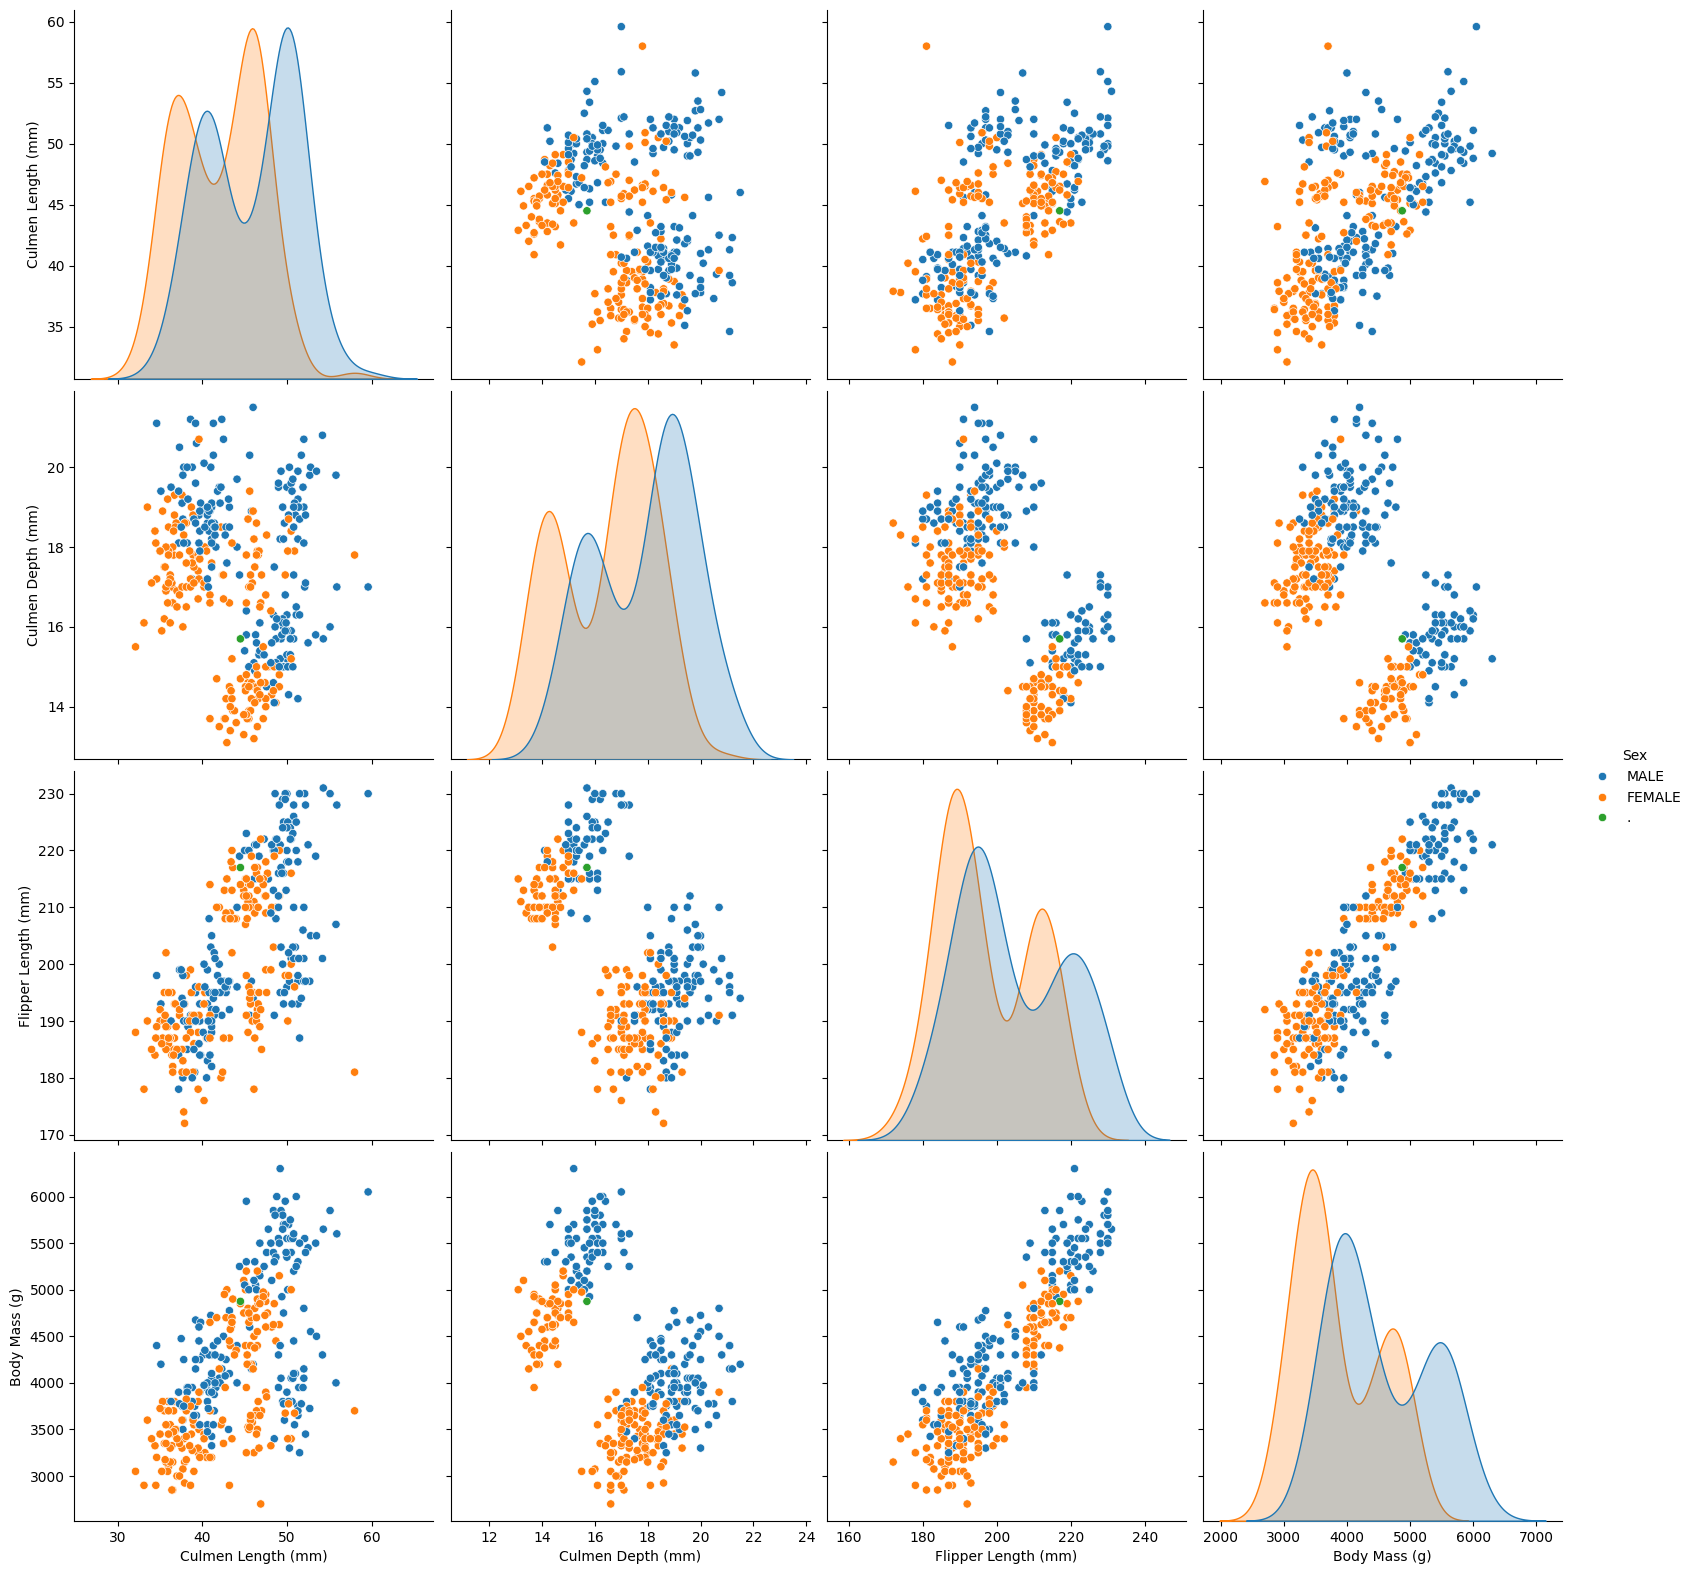

In [5]:
import seaborn as sns

_ = sns.pairplot(penguins, hue="Sex", height=4)

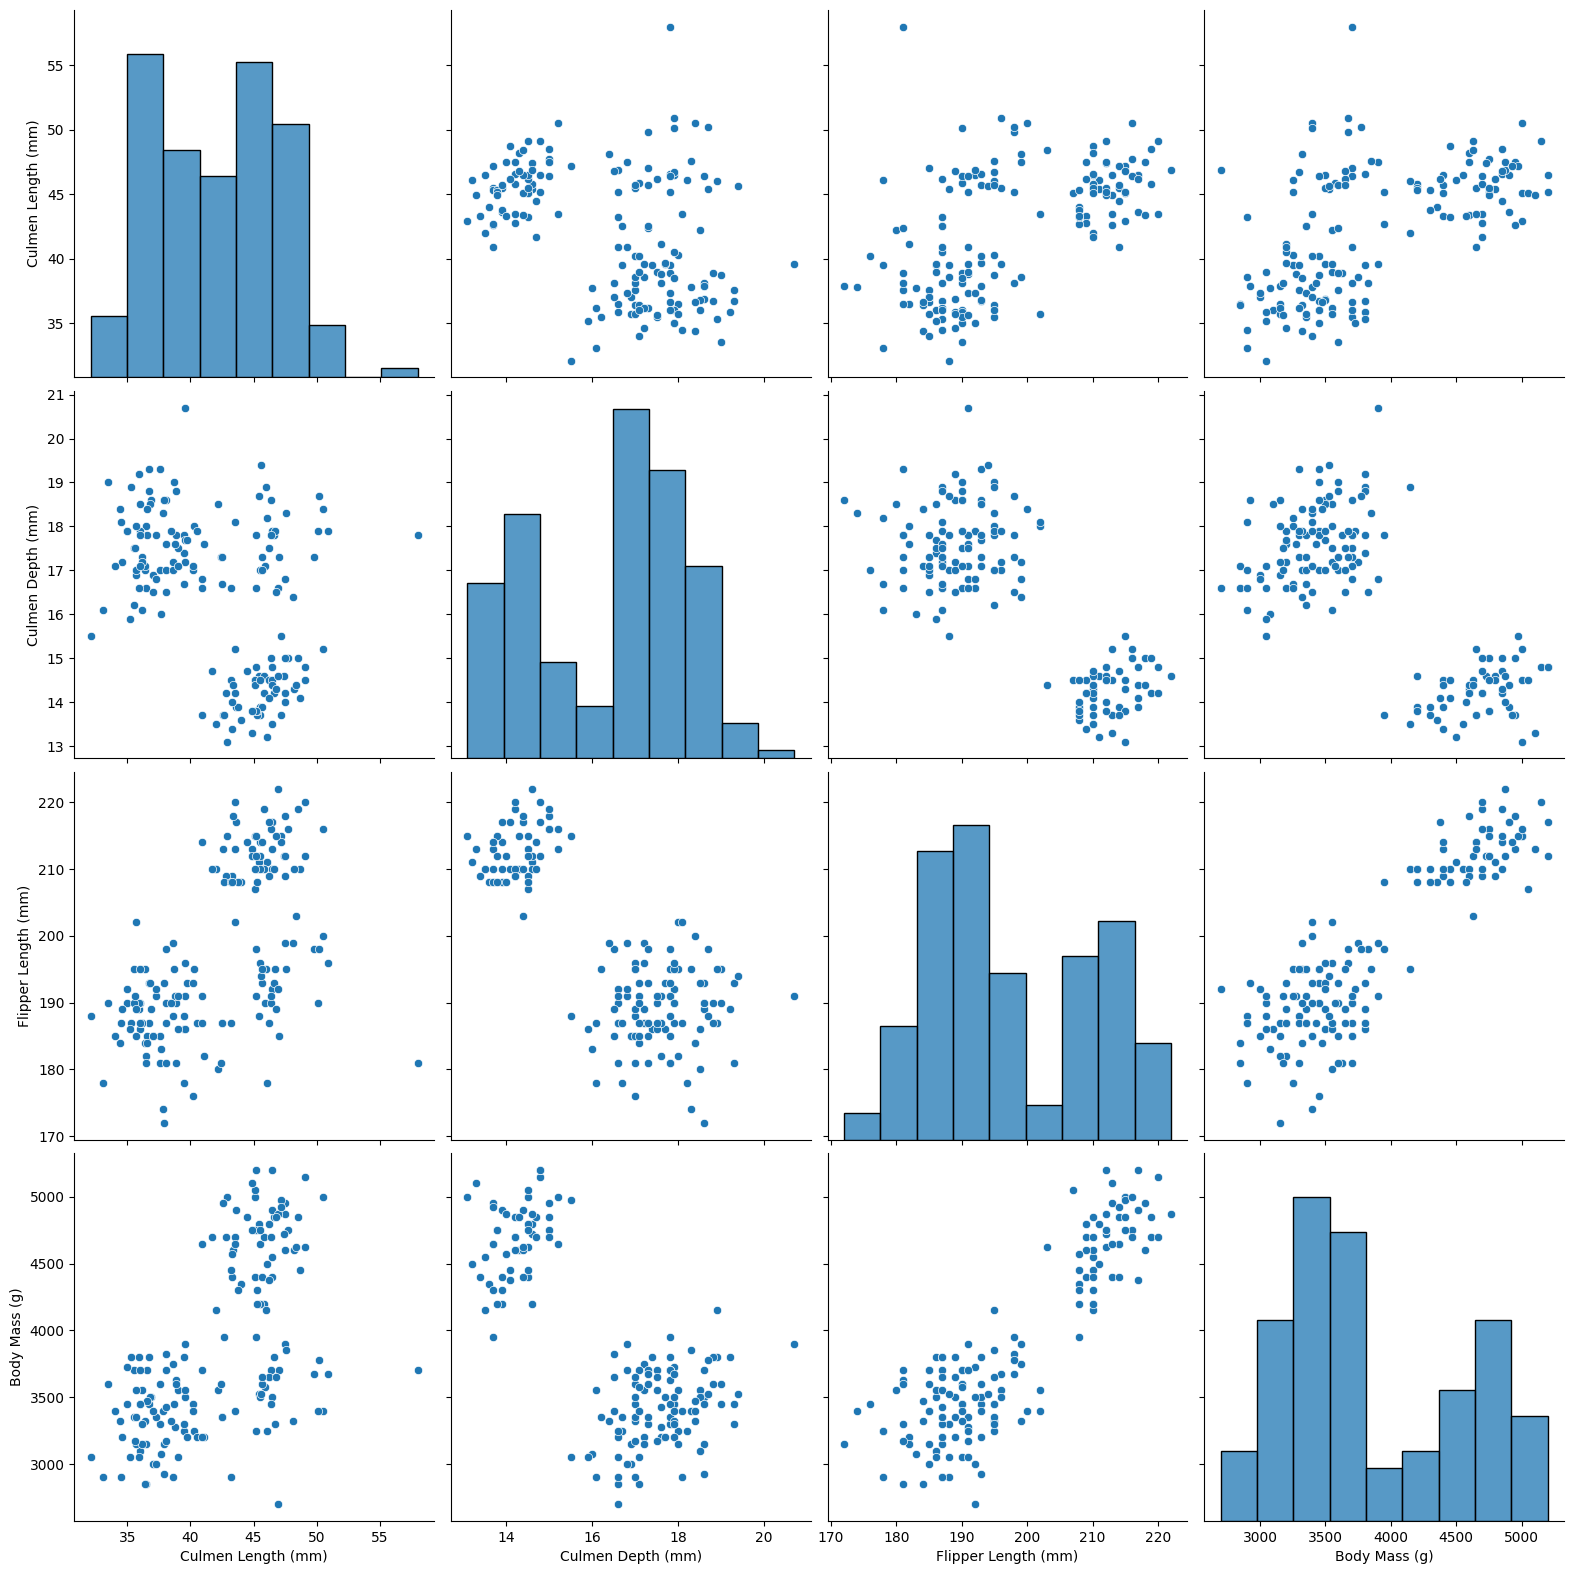

In [6]:
female_penguins = penguins.query("Sex == 'FEMALE'")
_ = sns.pairplot(female_penguins, height=4)

In [7]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=0)
labels_cl_vs_bm = kmeans.fit_predict(
    female_penguins[["Culmen Length (mm)", "Body Mass (g)"]]
)
labels_cl_vs_bm

array([2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 2, 0, 0, 2, 0, 0, 2, 2, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 2, 0, 2, 0, 0, 2, 0, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 1,
       1, 2, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2], dtype=int32)

<div class="admonition tip alert alert-warning">
<p class="first admonition-title" style="font-weight: bold;">Tip</p>
<p class="last">Here we used the <tt class="docutils literal">fit_predict</tt> method, which does both steps at once: it
learns from the data just as using <tt class="docutils literal">fit</tt>, and immediately returns cluster
labels for each data point using <tt class="docutils literal">predict</tt>. Cluster labels are coded with an
arbitrary integer between 0 and <tt class="docutils literal">n_clusters - 1</tt>.</p>
</div>

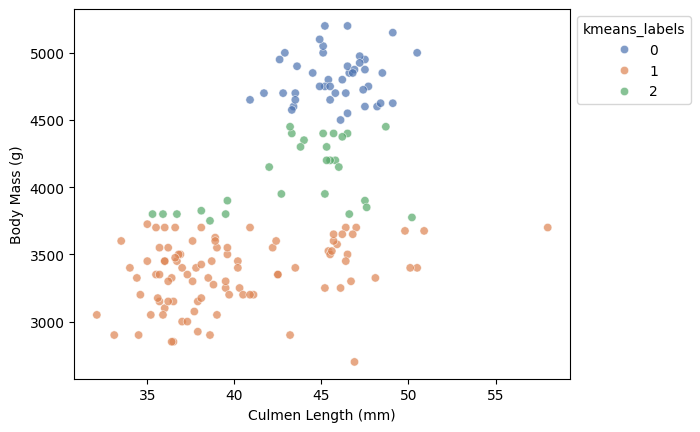

In [8]:
ax = sns.scatterplot(
    data=female_penguins.assign(kmeans_labels=labels_cl_vs_bm),
    x="Culmen Length (mm)",
    y="Body Mass (g)",
    hue="kmeans_labels",
    palette="deep",
    alpha=0.7,
)
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

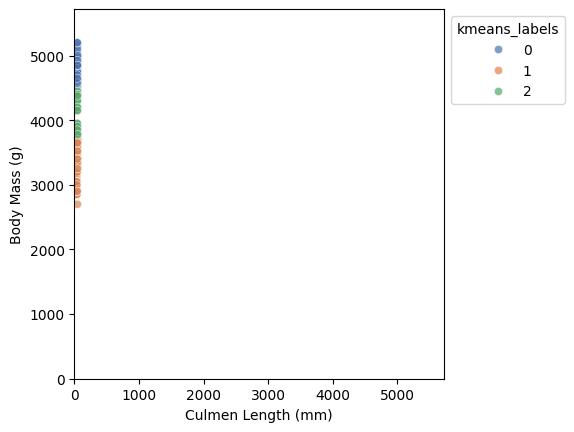

In [9]:
min_value = 0
max_value = female_penguins["Body Mass (g)"].max() * 1.1
ax = sns.scatterplot(
    data=female_penguins.assign(kmeans_labels=labels_cl_vs_bm),
    x="Culmen Length (mm)",
    y="Body Mass (g)",
    hue="kmeans_labels",
    palette="deep",
    alpha=0.7,
)
ax.set(
    xlim=(min_value, max_value),
    ylim=(min_value, max_value),
    aspect="equal",
)
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

In [10]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

scaled_kmeans = make_pipeline(
    StandardScaler(), KMeans(n_clusters=3, random_state=0)
)